In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [31]:
columns=['user_id','order_dt','order_products','order_amount']
df=pd.read_table('CDNOW.txt',names=columns,sep='\s+')

In [44]:
df.head()

,user_id,order_dt,order_products,order_amount
order_dt,,,,
19970101,1,1997-01-01,1,11.77
19970112,2,1997-01-12,1,12.00
19970112,2,1997-01-12,5,77.00
19970102,3,1997-01-02,2,20.76
19970330,3,1997-03-30,2,20.76


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69659 entries, 19970101 to 19970326
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null datetime64[ns]
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 5.2 MB


In [38]:
df.order_dt=pd.to_datetime(df.order_dt,format='%Y%m%d')#格式化日期

In [46]:
df.describe()

,user_id,order_products,order_amount
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


In [47]:
df = df.set_index('order_dt',drop=False)

In [48]:
month_grouped = df.resample('m').agg({'user_id':'count',
                    'order_products':'sum',
                    'order_amount':'sum'})
month_grouped['user_sum'] = df.resample('m')['user_id'].nunique()
month_grouped

,user_id,order_products,order_amount,user_sum
order_dt,,,,
1997-01-31,8928,19416,299060.17,7846
1997-02-28,11272,24921,379590.03,9633
1997-03-31,11598,26159,393155.27,9524
1997-04-30,3781,9729,142824.49,2822
1997-05-31,2895,7275,107933.30,2214
1997-06-30,3054,7301,108395.87,2339
1997-07-31,2942,8131,122078.88,2180
1997-08-31,2320,5851,88367.69,1772
1997-09-30,2296,5729,81948.80,1739


Populating the interactive namespace from numpy and matplotlib


/Users/frankfwu/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab', 'axes', 'rate']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0.5, 1.0, '每月的消费人数')

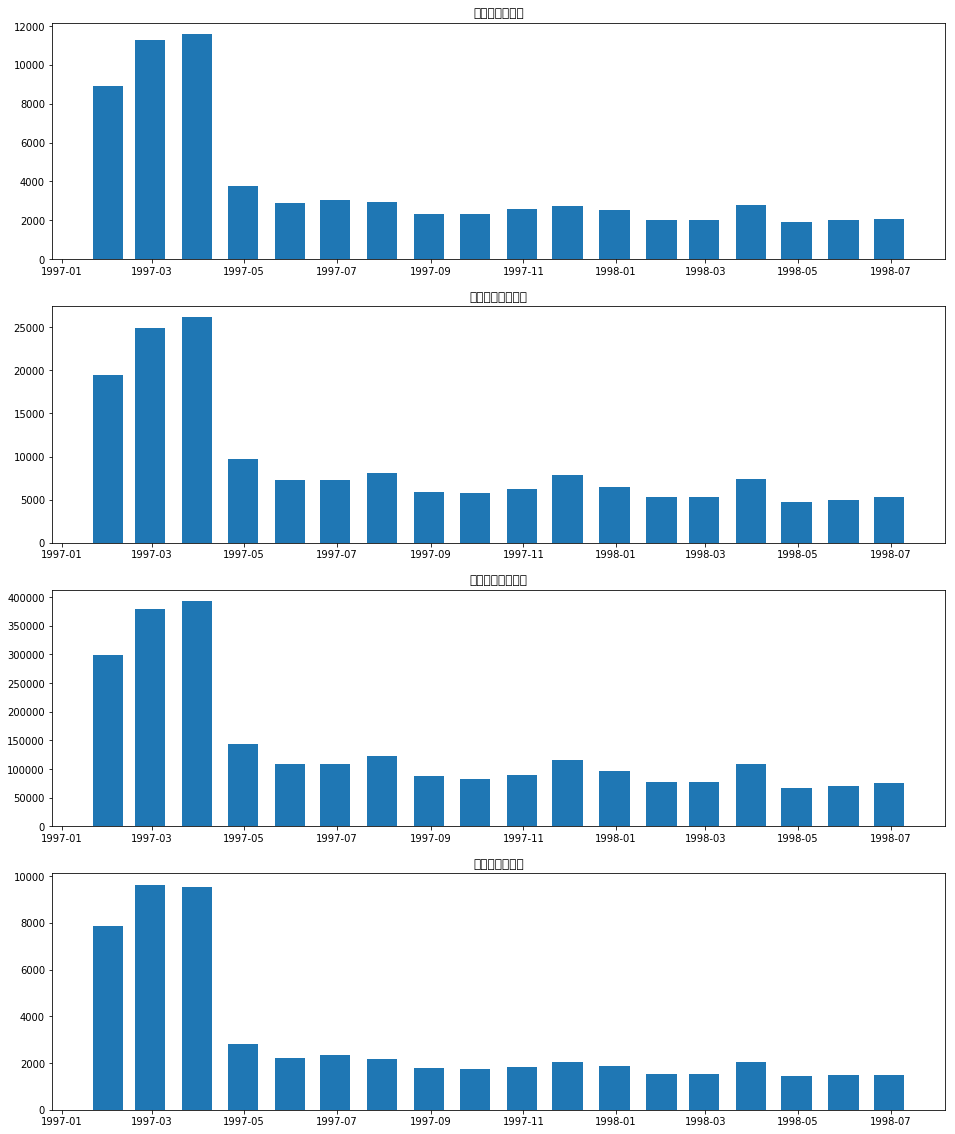

In [49]:
import pylab
%pylab inline
pylab.rcParams['figure.figsize']=(16,20)
fig,axes = plt.subplots(4,1)
axes0,axes1,axes2,axes3 = axes.flatten()
axes0.bar(month_grouped.index,month_grouped.user_id,width=20)
axes0.set_title('每月的消费频次')
axes1.bar(month_grouped.index,month_grouped.order_products,width=20)
axes1.set_title('每月的产品购买量')
axes2.bar(month_grouped.index,month_grouped.order_amount,width=20)
axes2.set_title('每月消费的总金额')
axes3.bar(month_grouped.index,month_grouped.user_sum,width=20)
axes3.set_title('每月的消费人数')

In [50]:
df.drop_duplicates('user_id')['user_id'].resample('m').count()

order_dt
1997-01-31    7846
1997-02-28    8476
1997-03-31    7248
Freq: M, Name: user_id, dtype: int64

<BarContainer object of 18 artists>

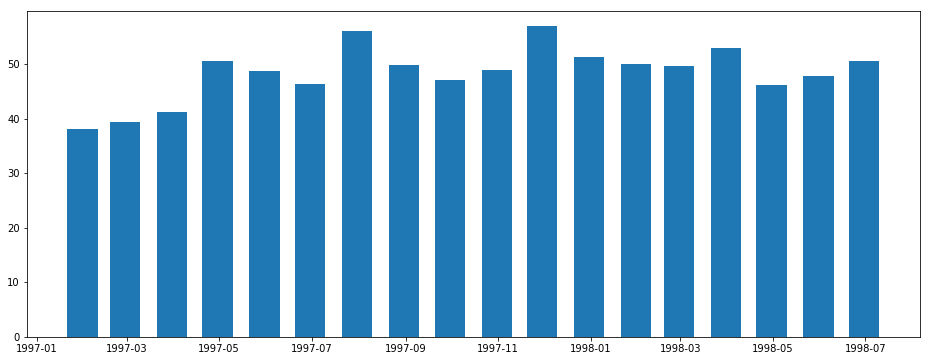

In [51]:
pylab.rcParams['figure.figsize']=(16,6)
user_avgamount = month_grouped['order_amount']/month_grouped['user_sum']
plt.bar(user_avgamount.index,user_avgamount,width=20)

Text(0.5, 1.0, '用户每月的平均消费次数')

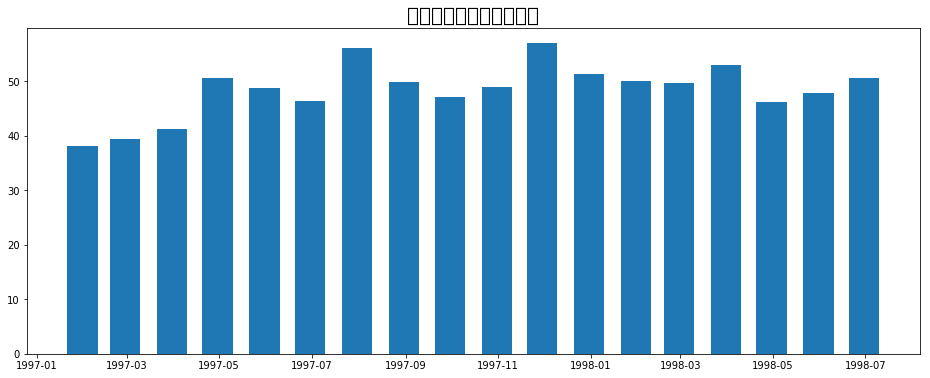

In [52]:
user_avgorder = month_grouped['order_products']/month_grouped['user_sum']
plt.bar(user_avgorder.index,user_avgamount,width=20)
plt.title('用户每月的平均消费次数',size=20)

In [53]:
user_grouped = df.groupby('user_id').agg({'user_id':'count',
                                          'order_products':'sum',
                                          'order_amount':'sum'})
user_grouped.describe()

,user_id,order_products,order_amount
count,23570.000000,23570.000000,23570.000000
mean,2.955409,7.122656,106.080426
std,4.736558,16.983531,240.925195
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,19.970000
50%,1.000000,3.000000,43.395000
75%,3.000000,7.000000,106.475000
max,217.000000,1033.000000,13990.930000


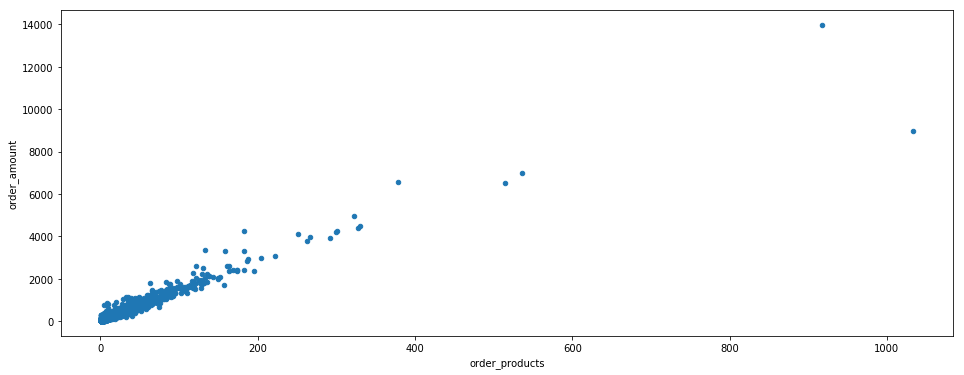

In [54]:
user_grouped.plot.scatter(x='order_products',y='order_amount')

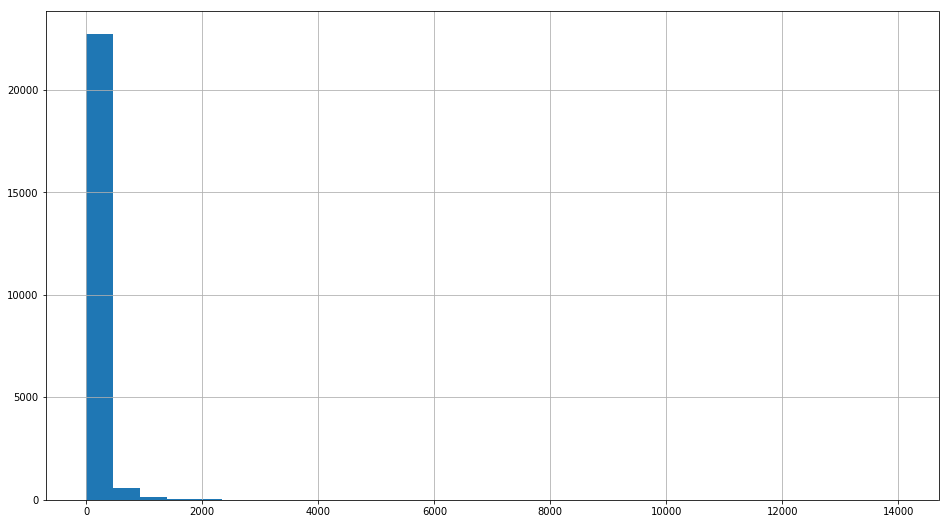

In [55]:
pylab.rcParams['figure.figsize']=(16,9)
user_grouped['order_amount'].hist(bins=30)

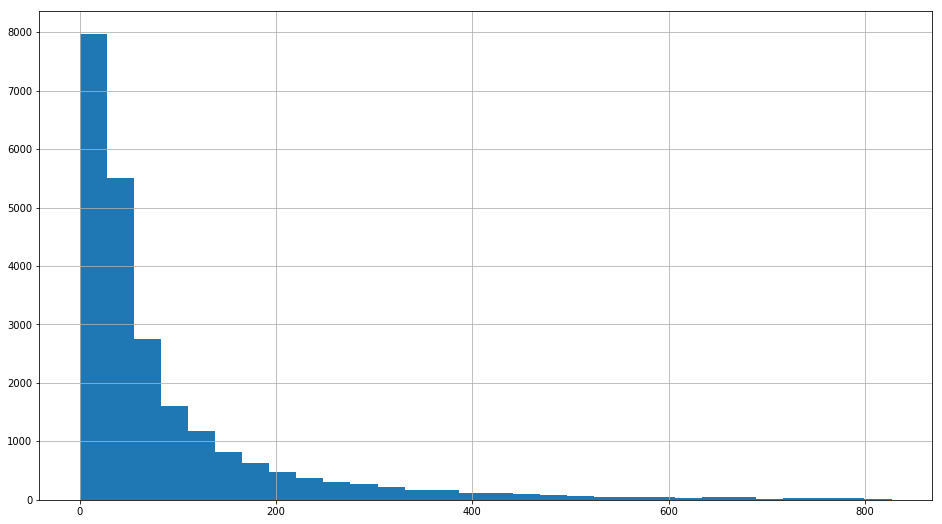

In [56]:
user_grouped.query('order_amount<829')['order_amount'].hist(bins=30)

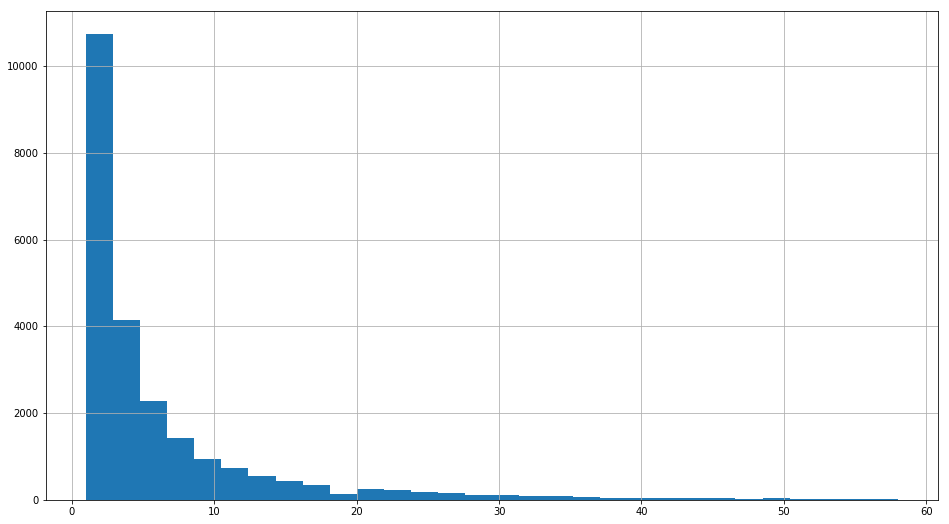

In [57]:
user_grouped.query('order_products<58.12')['order_products'].hist(bins=30)

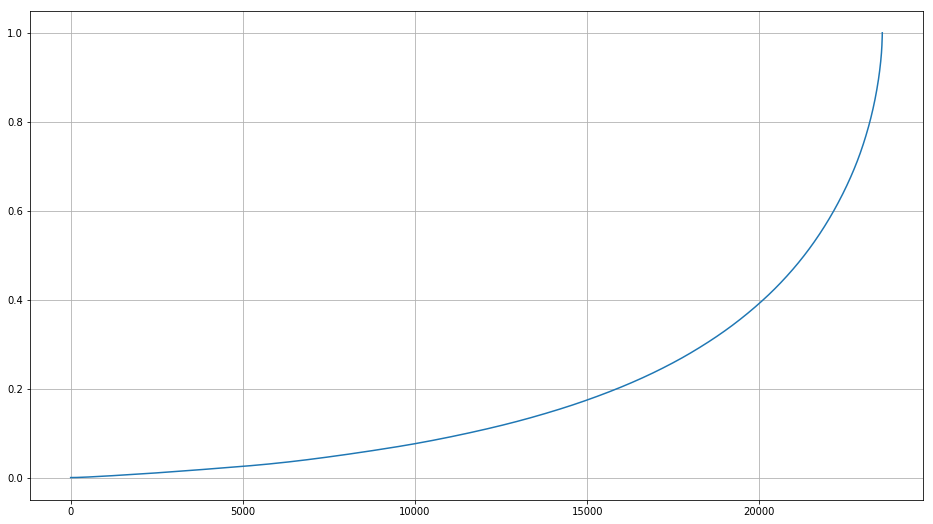

In [58]:
user_cumsum = user_grouped.sort_values('order_amount').apply(lambda x : x.cumsum()/x.sum())
user_cumsum.reset_index(drop=True).order_amount.plot()
plt.grid()

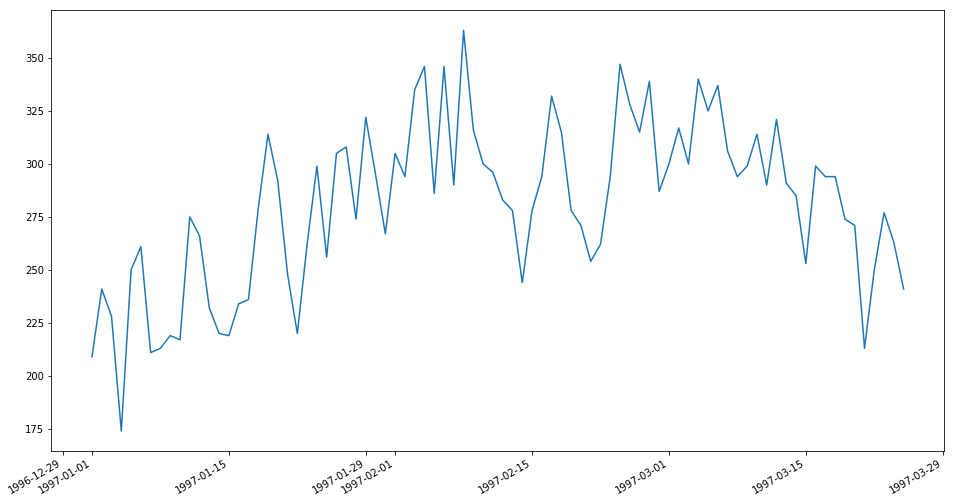

In [59]:
df.groupby('user_id')['order_dt'].min().value_counts().plot()

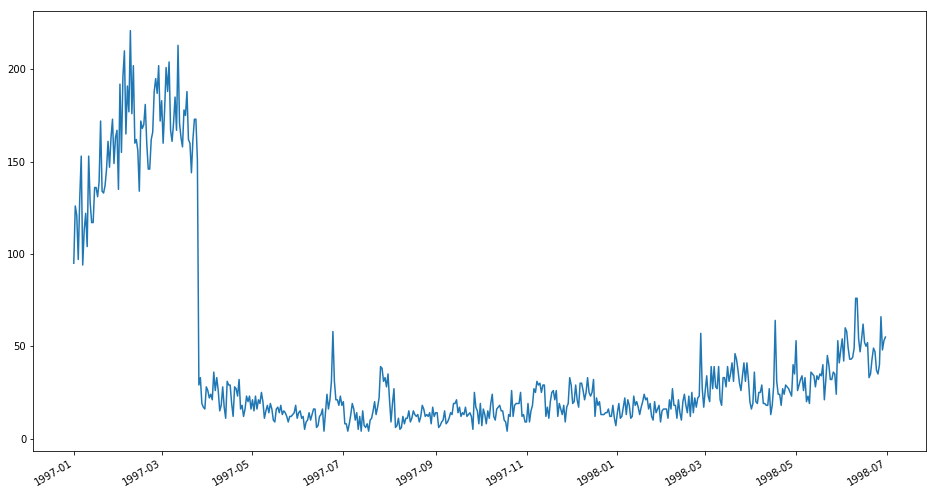

In [60]:
df.groupby('user_id')['order_dt'].max().value_counts().plot()

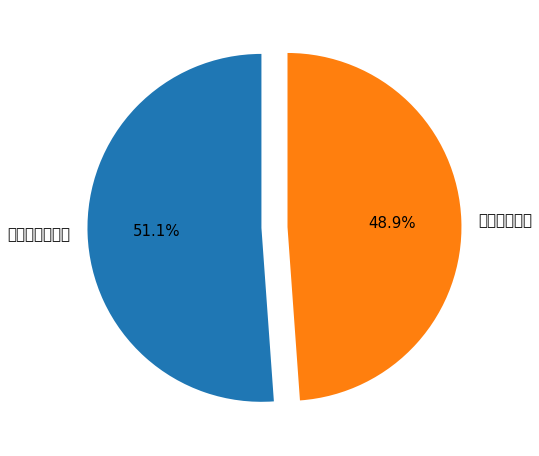

In [61]:
user_dt = df.groupby('user_id').order_dt.agg(['min','max'])
pylab.rcParams['figure.figsize']=(8,8)
rate = (user_dt['min'] == user_dt['max']).value_counts()
labels = ['只消费一次用户','多次消费用户']
patches,l_text,p_text = plt.pie(rate,labels=labels,
                                explode=(0,0.15),
                                autopct='%2.1f%%',
                                startangle=90,
                               )
for t in l_text: #调整标签字体大小
    t.set_size(15)
for t in p_text: #调整百分数字体大小
    t.set_size(15)

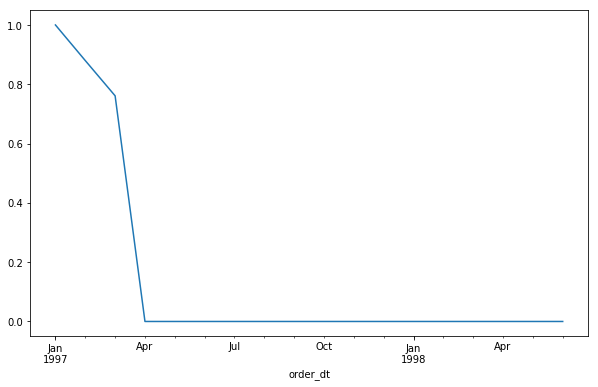

In [62]:
pylab.rcParams['figure.figsize']=(10,6)
user_new = df.drop_duplicates('user_id')['user_id'].resample('m').count()#计算每月首次购买产品的用户数
user_sum = df.resample('m')['user_id'].nunique()#计算每月购买产品的用户总数
(user_new/user_sum).fillna(0).plot()

In [66]:
df['period']=(df.order_dt - df.order_dt.max())/np.timedelta64(1,'D')#计算时间差，并转换为float类型

In [68]:
df.head()

,user_id,order_dt,order_products,order_amount,period
order_dt,,,,,
1997-01-01,1,1997-01-01,1,11.77,-545.0
1997-01-12,2,1997-01-12,1,12.00,-534.0
1997-01-12,2,1997-01-12,5,77.00,-534.0
1997-01-02,3,1997-01-02,2,20.76,-544.0
1997-03-30,3,1997-03-30,2,20.76,-457.0


In [69]:
user_rfm = df.pivot_table(values=['period','order_products','order_amount'],
                          index='user_id',aggfunc={'period':'max',
                                                  'order_products':'count',
                                                    'order_amount':'sum' })
user_rfm = user_rfm.rename(columns = {'order_amount':'M','order_products':'F','period':'R'})

In [71]:
user_rfm.head()

,M,F,R
user_id,,,
1,11.77,1,-545.0
2,89.00,2,-534.0
3,156.46,6,-33.0
4,100.50,4,-200.0
5,385.61,11,-178.0


In [72]:
def level_label(data):#定义分层函数
    level = data.apply(lambda x :'1' if x>=0 else '0')
    label = level['R']+level['F']+level['M']
    d = {
        '111':"高价值客户",
        '011':"重点保持客户",
        '101':"重点发展客户",
        '001':"重点挽留客户",
        '110':"一般价值客户",
        '010':"一般保持客户",
        '100':"一般发展客户",
        '000':"潜在客户"
    }
    result = d[label]
    return result


user_rfm['label'] = (user_rfm - user_rfm.mean()).apply(level_label,axis=1)

In [74]:
user_rfm.head()

,M,F,R,label
user_id,,,,
1,11.77,1,-545.0,潜在客户
2,89.00,2,-534.0,潜在客户
3,156.46,6,-33.0,高价值客户
4,100.50,4,-200.0,一般价值客户
5,385.61,11,-178.0,高价值客户


([<matplotlib.patches.Wedge at 0x1a228cf518>,
 [Text(-0.2860933107594532, 1.0621443487298208, '一般价值客户'),
  Text(-0.6198308814381726, 0.9087407102224365, '一般保持客户'),
  Text(-0.8444159346818219, 0.7049551257033496, '一般发展客户'),
  Text(-0.27049037250467173, -1.0662246284823307, '潜在客户'),
  Text(1.0983738720021392, 0.05978994315960101, '重点保持客户'),
  Text(1.087656630178898, 0.16432606253386645, '重点发展客户'),
  Text(1.0622206108449277, 0.28581003113296916, '重点挽留客户'),
  Text(0.6350044816695141, 0.8982033780050217, '高价值客户')],
 [Text(-0.15605089677788356, 0.5793514629435386, '8.4%'),
  Text(-0.33808957169354864, 0.49567675103041986, '2.3%'),
  Text(-0.4605905098264482, 0.38452097765637244, '6.5%'),
  Text(-0.1475402031843664, -0.5815770700812712, '57.7%'),
  Text(0.5991130210920759, 0.032612696268873274, '1.9%'),
  Text(0.5932672528248534, 0.08963239774574532, '1.1%'),
  Text(0.5793930604608696, 0.15589638061798314, '2.5%'),
  Text(0.34636608091064397, 0.48992911527546634, '19.6%')])

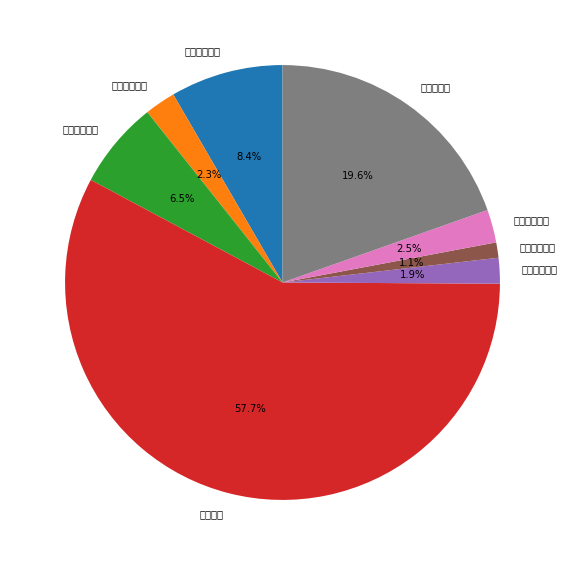

In [75]:
label_count = user_rfm.groupby('label').count()
pylab.rcParams['figure.figsize']=(10,10)
labels = ['一般价值客户','一般保持客户','一般发展客户','潜在客户','重点保持客户','重点发展客户','重点挽留客户','高价值客户']

plt.pie(label_count['M'],labels=labels,autopct = '%3.1f%%',startangle = 90)

In [77]:
pivoted_count = df.pivot_table(index = 'user_id',
                               columns='order_dt',
                               values = 'order_products',
                               aggfunc={'order_products':'count'})
pivoted_count = pivoted_count.fillna(0)

/Users/frankfwu/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/pivot.py:86: FutureWarning: 'order_dt' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=False)


In [78]:
pivoted_count.head()

order_dt,1997-01-01 00:00:00,1997-01-02 00:00:00,1997-01-03 00:00:00,1997-01-04 00:00:00,1997-01-05 00:00:00,1997-01-06 00:00:00,1997-01-07 00:00:00,1997-01-08 00:00:00,1997-01-09 00:00:00,1997-01-10 00:00:00,...,1998-06-21 00:00:00,1998-06-22 00:00:00,1998-06-23 00:00:00,1998-06-24 00:00:00,1998-06-25 00:00:00,1998-06-26 00:00:00,1998-06-27 00:00:00,1998-06-28 00:00:00,1998-06-29 00:00:00,1998-06-30 00:00:00
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
def status(data):
    state = []
    lenth = len(data)
    for i in range(18):
        if data[i]>0:
            if len(state) == 0:
                state.append('new')
            else:
                if state[i-1] == 'unreg':
                    state.append('new')
                elif state[i-1] == 'unactive':
                    state.append('return')
                else:
                    state.append('active')
                
        else:
            if len(state) == 0:
                state.append('unreg')
            else:
                if state[i-1] == 'unreg':
                    state.append('unreg')
                else:
                    state.append('unactive')
    return state
                    
pivoted_count.apply(status,axis=1)

user_id
1        [new, unactive, unactive, unactive, unactive, ...
2        [unreg, unreg, unreg, unreg, unreg, unreg, unr...
3        [unreg, new, unactive, unactive, unactive, una...
4        [new, unactive, unactive, unactive, unactive, ...
5        [new, unactive, unactive, unactive, unactive, ...
6        [new, unactive, unactive, unactive, unactive, ...
7        [new, unactive, unactive, unactive, unactive, ...
8        [new, unactive, unactive, unactive, unactive, ...
9        [new, unactive, unactive, unactive, unactive, ...
10       [unreg, unreg, unreg, unreg, unreg, unreg, unr...
11       [new, unactive, unactive, unactive, unactive, ...
12       [new, unactive, unactive, unactive, unactive, ...
13       [new, unactive, unactive, unactive, unactive, ...
14       [new, unactive, unactive, unactive, unactive, ...
15       [new, unactive, unactive, unactive, unactive, ...
16       [new, unactive, unactive, unactive, unactive, ...
17       [new, unactive, unactive, unactive, una

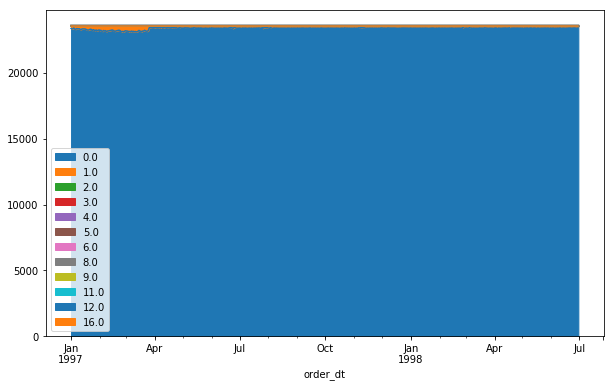

In [80]:
pylab.rcParams['figure.figsize'] = (10,6)
pivoted_count.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x)).T.fillna(0).plot.area()

In [81]:
user_period = df.groupby('user_id').apply(lambda x:x.order_dt-x.order_dt.shift())
user_period.describe()

count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: order_dt, dtype: object

Text(0.5, 1.0, '用户购买周期分布图')

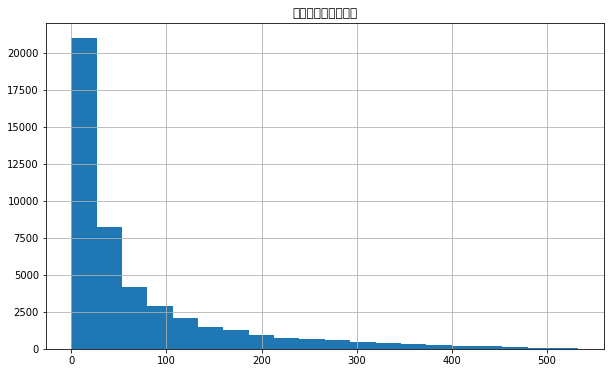

In [82]:
(user_period/np.timedelta64(1,'D')).hist(bins=20)
plt.title('用户购买周期分布图')

In [83]:
user_cycle = df.groupby('user_id').apply(lambda x:x.order_dt.max()-x.order_dt.min())
user_cycle.describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
dtype: object

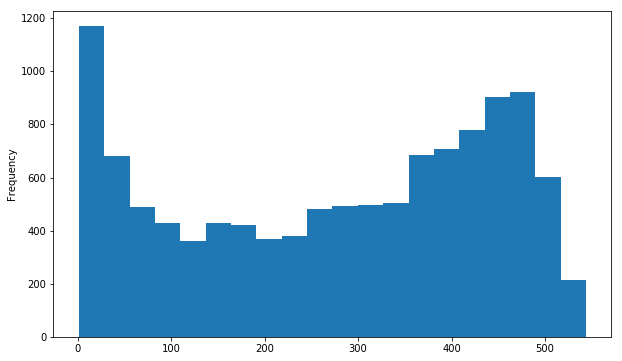

In [84]:
user_cycle = user_cycle/timedelta64(1,"D")
user_cycle[user_cycle>0].plot.hist(bins=20)

In [86]:
pivoted_count = df.pivot_table(index = 'user_id',
                               columns='order_dt',
                               values = 'order_products',
                               aggfunc={'order_products':'count'})
pivoted_count = pivoted_count.fillna(0)
df_purchase = pivoted_count.applymap(lambda x:1 if x>1 else np.nan if x==0 else 0)#清洗数据，消费超过两次为1，消费过1次为0，没有消费为nan

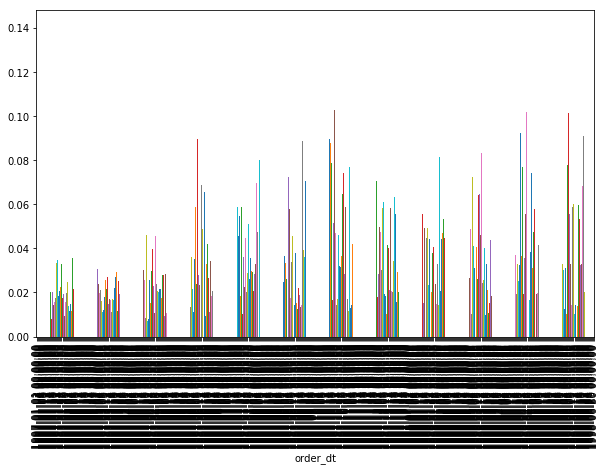

In [87]:
df_purchase.apply(lambda x:x.sum()/x.count()).plot.bar()

In [88]:
df_purchase_back = pivoted_count.applymap(lambda x:1 if x>0 else np.nan)
df_purchase_back.head()

order_dt,1997-01-01 00:00:00,1997-01-02 00:00:00,1997-01-03 00:00:00,1997-01-04 00:00:00,1997-01-05 00:00:00,1997-01-06 00:00:00,1997-01-07 00:00:00,1997-01-08 00:00:00,1997-01-09 00:00:00,1997-01-10 00:00:00,...,1998-06-21 00:00:00,1998-06-22 00:00:00,1998-06-23 00:00:00,1998-06-24 00:00:00,1998-06-25 00:00:00,1998-06-26 00:00:00,1998-06-27 00:00:00,1998-06-28 00:00:00,1998-06-29 00:00:00,1998-06-30 00:00:00
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
def purchase_back(data):
    lenth = len(data)
    state = []
    for i in range(0,lenth-1):
        if data[i] == 1:
            if data[i+1]==1:
                state.append(1) #若本月已消费，下个月也消费置1
            else:
                state.append(0) #本月已消费，下月未消费置0
        else:
            state.append(np.nan) #本月未消费置np.nan
    state.append(np.nan)
    return state
purchase_back(df_purchase_back)

KeyError: 0

In [91]:
df_purchase_b = df_purchase_back.apply(purchase_back,axis=1)
df_purchase_b.apply(lambda x:x.sum()/x.count()).plot.bar()

AttributeError: 'list' object has no attribute 'sum'